In [20]:
import helper
import matplotlib.pyplot as plt
from keras.applications import *
from keras.preprocessing.image import *

In [21]:
img_size_1 = (299,299)
img_size_2 = (224,224)
train_path = './data/train2'
test_path = './data/test1'
save_path_resnet = './merged_features/merged_featurs_resnet50_nu.h5'
save_path_inceptionv3 = './merged_features/merged_featurs_inceptionv3_nu.h5'
save_path_xception = './merged_features/merged_featurs_xception_nu.h5'
save_path_inceptionresnetv2 = './merged_features/merged_featurs_inceptionresnetv2_nu.h5'
save_path_vgg16 = './merged_features/merged_featurs_vgg16_nu.h5'
feature_files = [save_path_inceptionv3,save_path_xception,save_path_inceptionresnetv2]
#weights_save_path = './models/merged_features_model_weights_0403_3_nu_04.h5'
template_csv_path = './predicts/sample_submission.csv'
target_csv_path = './predicts/pred_merged_features_model_with_outliers_0405_no_outliers_03.csv'
model_image = 'models/merge_features_model_0405_no_outliers_03.png'


In [22]:
#生成单个模型的特征向量并保存到文件夹
print("start")
#helper.write_gap(resnet50.ResNet50,img_size_2, train_path, test_path, save_path_resnet, lambda_func=resnet50.preprocess_input)
helper.write_gap(inception_v3.InceptionV3,img_size_1, train_path, test_path, save_path_inceptionv3, lambda_func=inception_v3.preprocess_input)
helper.write_gap(xception.Xception,img_size_1, train_path, test_path, save_path_xception, lambda_func=xception.preprocess_input)
helper.write_gap(inception_resnet_v2.InceptionResNetV2,img_size_1, train_path, test_path, save_path_inceptionresnetv2, lambda_func=inception_resnet_v2.preprocess_input)
#helper.write_gap(vgg16.VGG16, img_size_1, train_path, test_path, save_path_vgg16, lambda_func=vgg16.preprocess_input)
print("finished")

start
finished


In [23]:
#读取各个模型的特征向量并融合并混洗，作为模型的输入
print("start")
X_train, y_train, X_test= helper.load_and_merge_features(feature_files)
print("finished")

start
finished
finished


In [24]:
#构造模型
model=helper.get_model_for_merge_features(X_train)
print("finished")

#可视化模型
helper.visualize_model(model, model_image)
print("finished")

finished
finished


In [25]:
history = model.fit(X_train, y_train, batch_size=128, epochs=7, validation_split=0.2)
print("finished")

Train on 19967 samples, validate on 4992 samples
Epoch 1/7
19967/19967 [==============================] - 1s 56us/step - loss: 0.0747 - acc: 0.9800 - val_loss: 0.0194 - val_acc: 0.9946
Epoch 2/7
19967/19967 [==============================] - 1s 49us/step - loss: 0.0173 - acc: 0.9957 - val_loss: 0.0128 - val_acc: 0.9962
Epoch 3/7
19967/19967 [==============================] - 1s 46us/step - loss: 0.0141 - acc: 0.9959 - val_loss: 0.0120 - val_acc: 0.9954
Epoch 4/7
19967/19967 [==============================] - 1s 47us/step - loss: 0.0122 - acc: 0.9965 - val_loss: 0.0151 - val_acc: 0.9950
Epoch 5/7
19967/19967 [==============================] - 1s 47us/step - loss: 0.0118 - acc: 0.9965 - val_loss: 0.0114 - val_acc: 0.9962
Epoch 6/7
19967/19967 [==============================] - 1s 47us/step - loss: 0.0106 - acc: 0.9969 - val_loss: 0.0111 - val_acc: 0.9962
Epoch 7/7
19967/19967 [==============================] - 1s 46us/step - loss: 0.0102 - acc: 0.9970 - val_loss: 0.0107 - val_acc: 0.9968

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


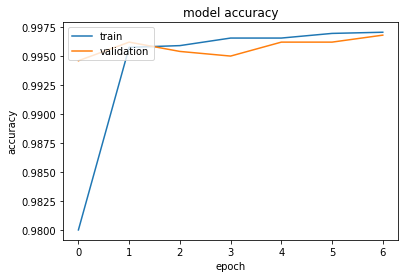

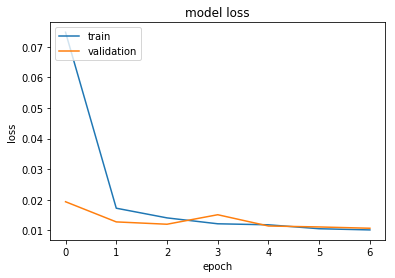

In [26]:

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [27]:
#model.save_weights(weights_save_path)
del X_train
del y_train
print("finished")

finished


In [28]:
print("start")
#获取文件basename
gen = ImageDataGenerator()
test_generator = gen.flow_from_directory(test_path, (224, 224), shuffle=False, 
                                         batch_size=16, class_mode=None)
image_file_names = test_generator.filenames

#预测并保存预测结果到csv
helper.predict_and_update_to_csv(model, X_test, image_file_names, template_csv_path, target_csv_path)

print("finished")


start
Found 12500 images belonging to 1 classes.
12500/12500 [==============================] - 0s 37us/step
finished
finished
